In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import scipy.interpolate
from datetime import datetime


In [ ]:
filename = 'waqi-covid19-airqualitydata_noDC.csv'
COVID_data = pd.read_csv(filename,skiprows=6,nrows=551928,header=0,sep=',',error_bad_lines=False,comment='#',na_values=[""])
filename = 'los-angeles-north main street-air-quality.csv'
LA_5yr_data = pd.read_csv(filename,nrows=2186,header=0,sep=',',comment='#',na_values=[""])

In [ ]:
#sort by date
COVID_LA = COVID_data.copy()
COVID_LA = COVID_data[(COVID_data['City'] == "Los Angeles") & (COVID_data['Specie'] == "pm25")]
COVID_LA["Date"] = pd.to_datetime(COVID_LA["Date"])
COVID_LA = COVID_LA.sort_values(by="Date")
#pull out median to plot
date = COVID_LA['Date']
med = COVID_LA['median']
avg_LA = np.average(med)
print(avg_LA)

In [ ]:
#historic data
#historic_LA['date'] = pd.to_datetime(historic_LA['date'])
historic_LA_pm25 = LA_5yr_data[' pm25']
historic_LA_avg = np.average(historic_LA_pm25)
historic_LA_avg2017 = np.average(historic_LA_pm25)
print(historic_LA_avg)
print(1-avg_LA/historic_LA_avg)
LA_5yr_data['date'] = pd.to_datetime(LA_5yr_data['date'],errors='raise', yearfirst=True)
LA_5yr_data.head()
#LA_5yr_data = LA_5yr_data.sort_values(by="date")

In [ ]:
fig, ax = plt.subplots()
ax.plot(LA_5yr_data['date'], LA_5yr_data[' pm25'], 'r')
#clearly an outlier in the data set

In [ ]:
LA_5yr_data.truncate('2017-01-01':)
fig, ax = plt.subplots()
ax.plot(LA_5yr_data.truncate('2017-01-01':)['date'], LA_5yr_data.truncate('2017-01-01':)[' pm25'], 'r')

In [ ]:
#multi-color lines
points_LA = np.array([date, med]).T.reshape(-1, 1, 2)
segments = np.concatenate([points_LA[:-1], points_LA[1:]], axis=1)
#...not finished

In [ ]:
#apply AQI bins
COVID_LA['status'] = pd.cut(COVID_LA['median'], bins=[-1, 12, 35.4, 55.4, 150.4, 250.4, 500.4], labels=False)
labels = np.array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
COVID_LA['status'] = labels[COVID_LA['status']]

In [ ]:
#collect data from other cities ... make function to pull out data by city?
#COVID_China = COVID_data[(COVID_data['City'] == "Changzhou") & (COVID_data['Specie'] == "pm25")]
#COVID_India = COVID_data[(COVID_data['City'] == "New Delhi") & (COVID_data['Specie'] == "pm25")]

In [24]:
#safer at home starting March 19
preCOVID_date = pd.array(['2019-12-30', '2020-03-19'])
preCOVID_pm25 = pd.array([historic_LA_avg, historic_LA_avg])
preCOVID_date = pd.to_datetime(preCOVID_date)

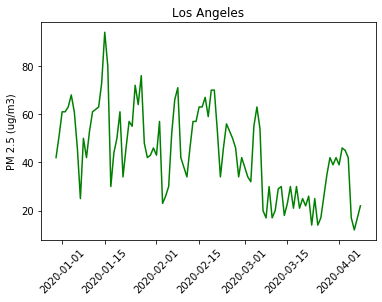

In [25]:
#plot
fig, ax = plt.subplots()
ax.plot(date, COVID_LA['median'], 'g')
#plot variations ... some of which don't work
#plot with benchmark pre-COVID
#ax.plot(date, COVID_LA['median'], 'g',preCOVID_date, preCOVID_pm25, 'r--')
#plot full historic data
#ax.plot(date, COVID_LA['median'], 'g',historic_date, historic_LA, 'r')
#plot looking at other countries
#ax.plot(date, COVID_LA['median'], 'g',date, COVID_China['median'], 'r.',date, COVID_India['median'], 'b.')
ax.set(ylabel='PM 2.5 (ug/m3)',title='Los Angeles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#create function to convert to 
#def conc2aqi(x):
    #aqi['status'] = pd.cut(COVID_LA['median'], bins=[-1, 12, 35.4, 55.4, 150.4, 250.4, 500.4], labels=False)
#could define funciton by status (each status would have a different line fuction)

In [ ]:
git remote add origin https://github.com/lukelom/SeedLA-HackForHope2020.git
git push -u origin master